# Absorption curve calculation

Frequency of Rb85 D2 line F=3->F=4 transition is 1.126486 GHz above Rb87 D2 line F=2->F=3 transition.


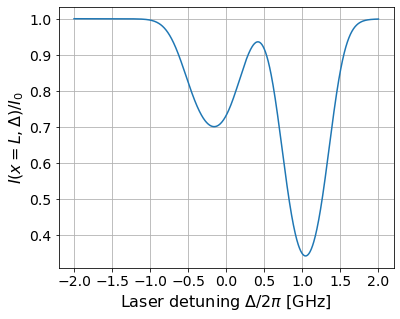

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
from functools import partial
import absorptionRb

print('Frequency of Rb85 D2 line F=3->F=4 transition is', round(absorptionRb.isotope_shift/1e9,6),
      'GHz above Rb87 D2 line F=2->F=3 transition.')

# used Beer's law, requires laser intensity much less than saturated intensity
T = 295 # Kelvin
vaporpres = 2e-7*100 # Pa, vapor pressure 
L = 0.11 # m, length of vapor cell

detuning = np.linspace(-2000e6, 2000e6, num=1000)

if __name__ == '__main__':
    pool = multiprocessing.Pool()
    ab = np.array(list(pool.map(partial(absorptionRb.absorption, T, vaporpres, L), detuning)))
    pool.close()
    pool.join()

fig = plt.figure(1, figsize=(6,4.8))    
plt.plot(detuning/1e9, ab)
plt.xlabel('Laser detuning $\Delta/2\pi$ [GHz]', fontsize=16)
plt.ylabel('$I(x=L, \Delta)$/$I_0$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()
# fig.savefig(r'C:\Users\qw95\Desktop\Document\Research\group meeting\model')

# Vapor cell absorption data fit

Rb total vapor pressure is 3.531e-07 mBar


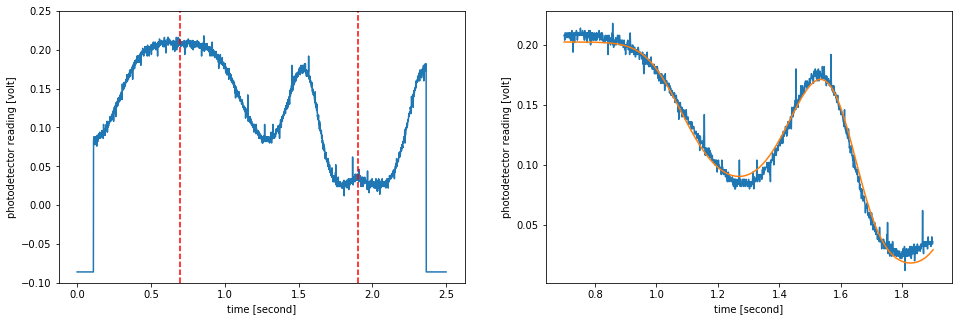

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import absorptionRb

# used Beer's law, requires laser intensity much less than saturated intensity
T = 310 # Kelvin
L = 0.075*2 # m, length of vapor cell (double pass)

data = np.loadtxt(r'C:\Users\qw95\Desktop\Document\Research\Rb\dispenser\vapor pressure calibration\absorption_vaporcell.txt')
datax = np.array([data[i, 0] for i in np.arange(len(data))])
datay = np.array([data[i, 1] for i in np.arange(len(data))])
timescaling = 0.001 # ms, time interval between two adjacent data points
lowlim = 700
highlim = 1900
dataxlim = np.array([data[i, 0] for i in np.arange(lowlim, highlim, 100)])
dataylim = np.array([data[i, 1] for i in np.arange(lowlim, highlim, 100)])
pltlowlim = -0.1
plthighlim = 0.25

def model(x, vaporpres, A, k, b):
    return [absorptionRb.absorption(T, vaporpres, L, k*(x0+b))*A for x0 in x]

popt, pcov = optimize.curve_fit(model, dataxlim, dataylim, p0=[5e-7*100, 0.21, 2.4e9, -1.3])
print('Rb total vapor pressure is', round(popt[0]/100, 10), 'mBar')
xx = np.linspace(lowlim*timescaling, highlim*timescaling, num = 100)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.ylim(pltlowlim, plthighlim)
plt.plot(datax, datay, [lowlim*timescaling, lowlim*timescaling], [pltlowlim, plthighlim], 'r--',
         [highlim*timescaling, highlim*timescaling], [pltlowlim, plthighlim], 'r--')
plt.xlabel('time [second]')
plt.ylabel('photodetector reading [volt]')

plt.subplot(1, 2, 2)
plt.plot(datax[lowlim:highlim], datay[lowlim:highlim], xx, model(xx, *popt))
plt.xlabel('time [second]')
plt.ylabel('photodetector reading [volt]')

plt.show()

# 2DMOT chamber absorption data fit

Rb total vapor pressure is 1.009e-07 mBar


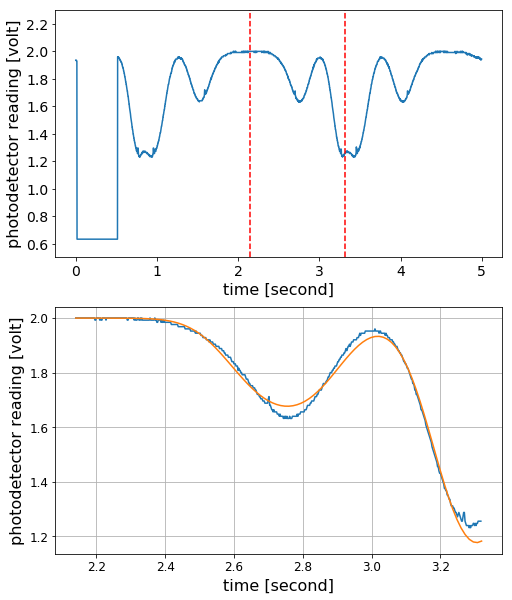

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import absorptionRb

# used Beer's law, requires laser intensity much less than saturated intensity
T = 300 # Kelvin
L = 0.11 # m

data = np.loadtxt(r'C:\Users\qw95\Desktop\Document\Research\Rb\dispenser\vapor pressure calibration\absorption_2DMOTchamber2.txt')
datax = np.array([data[i, 0] for i in np.arange(len(data))])
datay = np.array([data[i, 1] for i in np.arange(len(data))])
timescaling = 0.002 # ms, time interval between two adjacent data points
#lowlim = 940
#highlim = 1520
lowlim = 1070
highlim = 1660
dataxlim = np.array([data[i, 0] for i in np.arange(lowlim, highlim, 50)])
dataylim = np.array([data[i, 1] for i in np.arange(lowlim, highlim, 50)])
pltlowlim = 0.5
plthighlim = 2.3

def model(x, vaporpres, A, k, b):
    return [absorptionRb.absorption(T, vaporpres, L, k*(x0+b))*A for x0 in x]

popt, pcov = optimize.curve_fit(model, dataxlim, dataylim, p0=[2e-7*100, 2, 2.2e9, -3])
print('Rb total vapor pressure is', round(popt[0]/100, 10), 'mBar')
xx = np.linspace(lowlim*timescaling, highlim*timescaling, num = 100)


fig = plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
plt.ylim(pltlowlim, plthighlim)
plt.plot(datax, datay, [lowlim*timescaling, lowlim*timescaling], [pltlowlim, plthighlim], 'r--',
         [highlim*timescaling, highlim*timescaling], [pltlowlim, plthighlim], 'r--')
plt.xlabel('time [second]', fontsize=16)
plt.ylabel('photodetector reading [volt]', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2, 1, 2)
plt.plot(datax[lowlim:highlim], datay[lowlim:highlim], xx, model(xx, *popt))
plt.xlabel('time [second]', fontsize=16)
plt.ylabel('photodetector reading [volt]', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.show()

fig.savefig(r'C:\Users\qw95\Desktop\Document\Research\group meeting\fit')

In [ ]:
popt

array([ 1.00889623e-05,  1.99969102e+00,  2.18410632e+09, -2.82829646e+00])

# A quick way to calculate vapor pressure

In [ ]:
import numpy as np
sigma23 = 2.40624e-11 # cm^2
sigma22 = 3.96245e-12 # cm^2
sigma21 = 2.43451e-13 # cm^2
kb = 1.38064852e-23*(1e4) # cm^2 kg s^-2 K^-1
T = 313 # K
I0 = 212
Imin = 86
l = 7.5*2 # cm
eta87 = 0.2783 # abundance of Rb85
ptotal = np.log(I0/Imin)/l/(sigma23+sigma22+sigma21)*kb*T*1e2/1e2/eta87/(5/8)
print('Calibrated from Rb87, total vapor pressure in vapor cell is', round(ptotal, 10), 'mBar.')
print('\nAssumed room temperature, may not be accurate enough')
print('Assumed min in absorption curve happens at zero detuning, may not be accurate enough')
print('Assumed all ground hyperfine states are equally populated')

Calibrated from Rb87, total vapor pressure in vapor cell is 5.286e-07 mBar.

Assumed room temperature, may not be accurate enough
Assumed min in absorption curve happens at zero detuning, may not be accurate enough
Assumed all ground hyperfine states are equally populated


In [18]:
import numpy as np
sigma23 = 2.40624e-11 # cm^2
sigma22 = 3.96245e-12 # cm^2
sigma21 = 2.43451e-13 # cm^2
kb = 1.38064852e-23*(1e4) # cm^2 kg s^-2 K^-1
T = 294 # K
I0 = 244
Imin = 214
Ioffset = 0
I0 = I0 - Ioffset
Imin = Imin - Ioffset
l = 4 # cm
eta87 = 0.2783 # abundance of Rb87
ptotal = np.log(I0/Imin)/l/(sigma23+sigma22+sigma21)*kb*T*1e2/1e2/eta87/(5/8)
print('Calibrated from Rb87, total vapor pressure in 2D MOT chamber is', round(ptotal, 10), 'mBar.')
print('\nAssumed room temperature, may not be accurate enough')
print('Assumed min in absorption curve happens at zero detuning, may not be accurate enough')
print('Assumed all ground hyperfine states are equally populated')

Calibrated from Rb87, total vapor pressure in 2D MOT chamber is 2.708e-07 mBar.

Assumed room temperature, may not be accurate enough
Assumed min in absorption curve happens at zero detuning, may not be accurate enough
Assumed all ground hyperfine states are equally populated


# vapor pressure measured in 07/15 &07/16

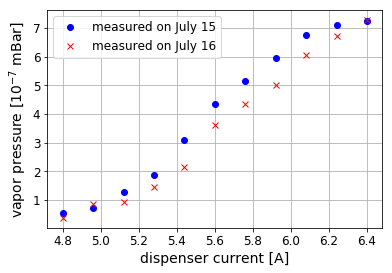

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

current = np.array([0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8])*8
pres15 = np.array([0.54, 0.73, 1.28, 1.87, 3.08, 4.36, 5.15, 5.97, 6.76, 7.12, 7.26])
pres16 = np.array([0.38, 0.86, 0.92, 1.45, 2.17, 3.62, 4.34, 5.03, 6.07, 6.72, 7.27])

fig = plt.figure()
plt.plot(current, pres15, 'bo', label='measured on July 15')
plt.plot(current, pres16, 'rx', label='measured on July 16')
plt.legend(fontsize=12)
plt.xlabel('dispenser current [A]', fontsize=14)
plt.ylabel('vapor pressure [$10^{-7}$ mBar]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

fig.savefig(r'C:\Users\qw95\Desktop\Document\Research\group meeting\measurement', dpi=300)

# Absorption cross section

In [ ]:
import numpy as np

wavelength = 780.2e-7 # in cm
cross_section_23 = wavelength**2/2/np.pi*(7/5)
cross_section_23 = cross_section_23*np.sqrt(np.pi)/2*6/303
cross_section_22 = wavelength**2/2/np.pi*(5/5)*(1/2)
cross_section_22 = cross_section_22*np.sqrt(np.pi)/2*6/303*np.exp(-(267/303)**2)
cross_section_21 = wavelength**2/2/np.pi*(3/5)*(1/6)
cross_section_21 = cross_section_21*np.sqrt(np.pi)/2*6/303*np.exp(-(424/303)**2)

print(cross_section_23)
print(cross_section_22)
print(cross_section_21)

print(cross_section_23+cross_section_22+cross_section_21)

2.3802009370660755e-11
3.910472014514679e-12
2.3992243964127555e-13
2.795240382481671e-11
